Title: 

Introduction:
1. Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
2. Clearly state the question you will try to answer with your project
3. Identify and describe the dataset that will be used to answer the question

Preliminary exploratory data analysis:
1. Demonstrate that the dataset can be read from the web into R 
2. Clean and wrangle your data into a tidy format
3. Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
4. Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

Methods:

Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
Describe at least one way that you will visualize the results


Expected outcomes and significance:

What do you expect to find?
What impact could such findings have?
What future questions could this lead to?

In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
options(repr.matrix.max.rows = 6)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

# start the coding here

In [2]:
# read data here

cleveland_data <- read.table("data/heart_disease/processed.cleveland.data", sep=",")
colnames(cleveland_data)<-c('age','sex','cp','trestbps','chol','fbs', 'restcg', 'thalach',
                                     'exang','oldpeak','slope','ca','thal','num')
# cleveland_data

#clean the data
cleveland_clean <- cleveland_data |> mutate(age = as.numeric(age),
                                                sex = as_factor(sex),
                                                cp = as_factor(cp),
                                                trestbps = as.numeric(trestbps),
                                                chol = as.numeric(chol),
                                                fbs = as_factor(fbs),
                                                restcg = as_factor(restcg),
                                                thalach = as.numeric(thalach),
                                                exang = as_factor(exang),
                                                oldpeak = as.numeric(oldpeak),
                                                slope = as.numeric(slope),
                                                ca = as.numeric(ca),
                                                thal = as_factor(thal),
                                                num = as.numeric(num))
cleveland_clean |> mutate( sex = fct_recode(sex, "male" = "1", "female" = "0"))

# cp ~ trestbps
# Using the values of trestbps + thalach to predict the cp of the patient.

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `ca = as.numeric(ca)`.
Caused by warning:
! NAs introduced by coercion”


age,sex,cp,trestbps,chol,fbs,restcg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
63,male,1,145,233,1,2,150,0,2.3,3,0,6.0,0
67,male,4,160,286,0,2,108,1,1.5,2,3,3.0,2
67,male,4,120,229,0,2,129,1,2.6,2,2,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,male,4,130,131,0,0,115,1,1.2,2,1,7.0,3
57,female,2,130,236,0,2,174,0,0.0,2,1,3.0,1
38,male,3,138,175,0,0,173,0,0.0,1,NA,3.0,0


In [4]:
set.seed(20)
#select columns:trestbps, thalach, cp
cleveland_select<- cleveland_clean|>
select(trestbps, thalach, cp)

#split the dataset into training set and testing set

cleveland_split<-initial_split(cleveland_select, prop=0.75, strata=cp)
cleveland_train<-training(cleveland_split)
cleveland_test<-testing(cleveland_split)

cleveland_train

trestbps,thalach,cp
<dbl>,<dbl>,<fct>
130,172,2
120,178,2
140,153,2
⋮,⋮,⋮
164,90,4
144,141,4
130,115,4


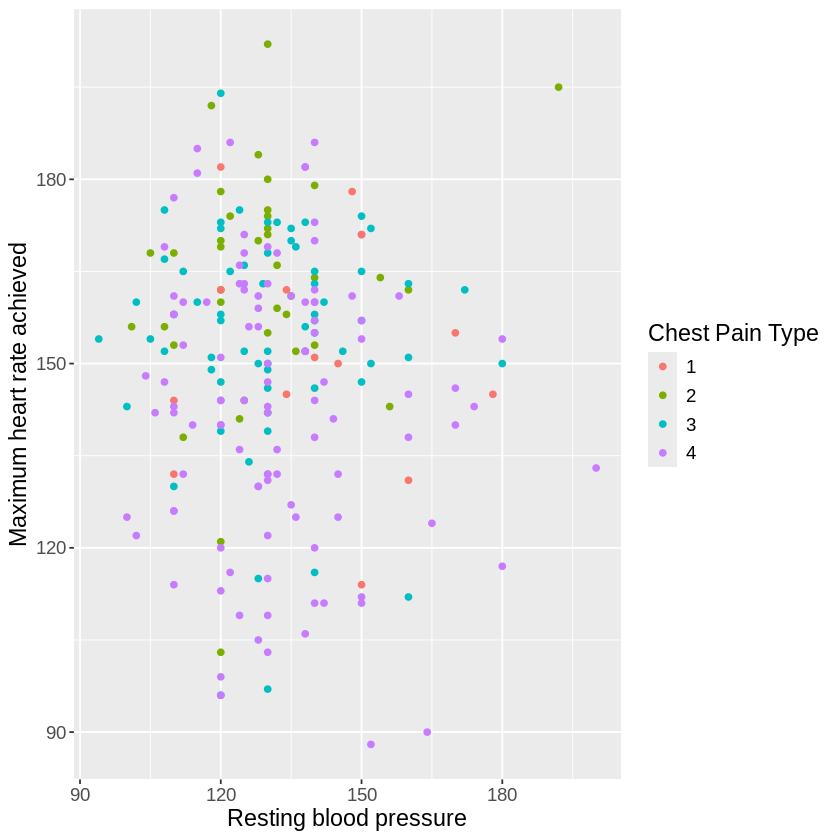

In [6]:
#The unscaled plot with training data here
options(repr.plot.width=7, repr.plot.height=7)


cleveland_train_plot <-cleveland_train |>
ggplot(aes(x=trestbps, y=thalach))+
geom_point(aes(colour=cp))+
labs(x="Resting blood pressure",y="Maximum heart rate achieved", colour="Chest Pain Type")+
theme(text=element_text(size=14))

cleveland_train_plot

In [4]:
#scale the values

cleveland_recipe<-recipe(cp~trestbps+thalach, data=cleveland_train)|>
step_scale(all_predictors())|>
step_center(all_predictors())


In [10]:
#knn_spec
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbor = ) |>
    set_engine("kknn") |>
    set_mode("classification")

ERROR: [1m[33mError[39m in `nearest_neighbor()`:[22m
[33m![39m 'rectangular' is not a known mode for model `nearest_neighbor()`.
